# Exploratory Data Analysis Carsale Advetisement Dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - * [Understanding the Dataset](#section301)<br/>
    - * [Profiling_1](#section302)<br/>
    - * [Preprocessing_1](#section303)<br/>
    - * [Profiling_2](#section304)<br/>
    - * [Preprocessing_2](#section305)<br/>
    - * [Post Profiling](#section306)<br/>
4. [Conclusions](#section4)<br/>  

<a id=section1></a>

### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 


<a id=section2></a>

### 2. Data Loading and Description

<a id=section201></a>

- The dataset consists information collected from car sale advertisements for study/practice purpose where most of them're used cars.
- The dataset comprises of __9576 observations of 10 columns__. Below is a table showing names of all the columns and their description.


<table>
<thead>
    <style>
td {
  text-align: center;
}
</style>
<tr>
<th>Column Name</th>
<th>Description</th>
</tr>
</thead>
<tbody><tr>
<td>car</td>
<td>Manufacturer brand</td>
</tr>
<tr>
<td>price</td>
<td>Seller’s price in advertisement (in USD)</td>
</tr>
<tr>
<td>body</td>
<td>Car body type</td>
</tr>
<tr>
<td>mileage</td>
<td>as mentioned in advertisement (‘000 Km)</td>
</tr>
<tr>
<td>engV</td>
<td>rounded engine volume (‘000 cubic cm)</td>
</tr>
<tr>
<td>engType</td>
<td>type of fuel (“Other” in this case should be treated as NA)</td>
</tr>
<tr>
<td>registration</td>
<td>whether car registered in Ukraine or not</td>
</tr>
<tr>
<td>year</td>
<td>year of production</td>
</tr>
<tr>
<td>model</td>
<td>specific model name</td>
</tr>
<tr>
<td>drive</td>
<td>drive type</td>
</tr>
</tbody></table>

#### Some Background Information
 - This data was collected from private car sale advertisements in Ukraine and provided by INSAID team to perform Exploratory Data Analysis.
 - This dataset has real raw data which has all inconvenient moments (as NA’s for example).
 - This dataset contains data for more than 9.5K cars sale in Ukraine. Most of them are used cars so it opens the possibility to analyze features related to car operation.

#### Importing packages                                          

In [43]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output



#### Importing the Dataset

In [44]:
#If you get UnicodeDecodeError - 'utf8' codec can't decode, invalid continuation byte error, either use engine='python'
#or encoding='latin-1' options
carsale = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv", engine='python', encoding='latin-1')     # Importing car_sale dataset using pd.read_csv

<a id=section3></a>

## 3. Data Profiling

<a id=section301></a>

### 3.1 Understanding the Carsale Dataset

In [45]:
carsale.shape    # This will print the number of rows and comlumns of the Data Frame

(9576, 10)

__Carsale Dataset__  has __9576 rows__ and __10 columns.__

In [46]:
carsale.columns  # This will print the names of all columns.

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [47]:
carsale.head()   # Will give you first 5 records

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [48]:
carsale.tail()   # This will print the last n rows of the Data Frame

,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [49]:
carsale.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [50]:
# Use include='all' option to generate descriptive statistics for all columns
# You can get idea about which column has missing values using this
carsale.describe() 

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


- We can see all numeric columns having count __9576__ except __engV__. Looks like this column has some missing values
- __price__ and __mileage__ has __min__ value as __Zero__ which is not possible. We need to look into to replace them as __NaN__ to make them null values

In [51]:
carsale.isnull().sum() # Will show you null count for each column, but will not count Zeros(0) as null

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

- We can see that __engV__ and __drive__ columns contains __maximum null values__. But it didn't consider __0__ as missing value, so we have to figure out how to deal with this as mentioned above too.

<a id=section302></a>

<a id=section302></a>

### * Profiling_1

In [52]:
profile = ProfileReport(carsale, title="Pandas Profiling Report")

In [54]:
profile = ProfileReport(carsale, title='Pandas Profiling Report', explorative=True)

In [55]:
profile.to_widgets()

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


- I have done Pandas Profiling before preprocessing dataset, so we can get initial observations from the dataset in better visual aspects, to find correlation matrix and sample data.


- Initial observation as a result from profiling of __Carsale Dataset__ can be seen in  __Profiling 1 Section__


<a id=section303></a>

### * Preprocessing_1

- __engType__ column has __"Other"__ values as well, So as mentioned above in data description, we should treat them as NA. So we'll be replacing those to __NaN__
- __price__ has __267__ zeros which should be treated as missing values. So we'll be replacing those to __NaN__
- __mileage__ has __348__ zeros which should be treated as missing values. So we'll be replacing those to __NaN__

In [57]:
carsale.replace({'engType': 'Other', 'price': 0, 'mileage': 0}, np.nan, inplace=True)

<a id=section304></a>

### * Profiling_2

- Let see what are the changes after __Preprocessing_1__ in initial observations from profiling

In [58]:
profile.to_widgets()

- Initial observation as a result from profiling of Carsale Dataset can be seen in __cpreprocessing_2__


<a id=section305></a>

### * Preprocessing_2
<br>
Now we will deal with handling duplicates and missing values

- __duplicates__: As there are __113__ duplicate rows in dataset, we have to remove those first.

In [59]:
carsale.drop_duplicates(inplace=True) #inplace used to modify the dataset with applied command
carsale.shape

(9463, 10)

### *  Handling numerical data
- __price__: Replacing missing values now for __price__ column based on __[car,model]__ group product and __median__ value of __price__ based on this group. 


In [60]:
def get_median_price(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif carsale.groupby(['car'])['price'].count()[brand] > 0:
        brand_median = carsale.groupby(['car'])['price'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'price' feature. 
        return carsale['price'].median() # Otherwise return dataset's median for the 'price' feature.
    
price_median = carsale.groupby(['car','model'])['price'].apply(get_median_price).reset_index()
price_median.rename(columns={'price': 'price_med'}, inplace=True)
price_median.head()

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,car,model,price_med
0,Acura,MDX,17200.0
1,Acura,RL,13950.0
2,Acura,TL,8699.0
3,Acura,TLX,38200.0
4,Acura,ZDX,30999.0


In [61]:
def fill_with_median(x):
    if pd.isnull(x['price']):
        return price_median[(price_median['car'] == x['car']) & (price_median['model'] == x['model'])]['price_med'].values[0]
    else:
        return x['price']
    
carsale['price'] = carsale.apply(fill_with_median, axis=1)
carsale.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,NaN,NaN,yes,2013,E-Class,NaN


- __engV__: Replacing missing values now for __engV__ column based on __[car,model]__ group product and __median__ value of __engV__ based on this group. 


In [62]:
def get_median_engV(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif carsale.groupby(['car'])['engV'].count()[brand] > 0:
        brand_median = carsale.groupby(['car'])['engV'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'engV' feature. 
        return carsale['engV'].median() # Otherwise return dataset's median for the 'engV' feature.
    
engV_median = carsale.groupby(['car','model'])['engV'].apply(get_median_engV).reset_index()
engV_median.rename(columns={'engV': 'engV_med'}, inplace=True)
engV_median.head()

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,car,model,engV_med
0,Acura,MDX,3.7
1,Acura,RL,3.5
2,Acura,TL,3.2
3,Acura,TLX,2.4
4,Acura,ZDX,3.7


In [63]:
def fill_with_median(x):
    if pd.isnull(x['engV']):
        return engV_median[(engV_median['car'] == x['car']) & (engV_median['model'] == x['model'])]['engV_med'].values[0]
    else:
        return x['engV']
    
carsale['engV'] = carsale.apply(fill_with_median, axis=1)
carsale.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.6,NaN,yes,2013,E-Class,NaN


- __mileage__: Replacing missing values now for __mileage__ column based on __[car,model,year]__ group product and __median__ value of __mileage__ based on this group. Year has been included here as per data observations year to year mileage is getting down for the same Car/Brand combination.

In [64]:
def get_median_mileage(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif carsale.groupby(['car'])['mileage'].count()[brand] > 0:
        brand_median = carsale.groupby(['car'])['mileage'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'mileage' feature. 
        return carsale['mileage'].median() # Otherwise return dataset's median for the 'mileage' feature.
    
mileage_median = carsale.groupby(['car','model'])['mileage'].apply(get_median_mileage).reset_index()
mileage_median.rename(columns={'mileage': 'mileage_med'}, inplace=True)
mileage_median.head()

,car,model,mileage_med
0,Acura,MDX,85.0
1,Acura,RL,138.0
2,Acura,TL,145.0
3,Acura,TLX,4.0
4,Acura,ZDX,32.0


In [65]:
def fill_with_median(x):
    if pd.isnull(x['mileage']):
        return mileage_median[(mileage_median['car'] == x['car']) & (mileage_median['model'] == x['model'])]['mileage_med'].values[0]
    else:
        return x['mileage']
    
carsale['mileage'] = carsale.apply(fill_with_median, axis=1)
carsale.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.6,NaN,yes,2013,E-Class,NaN


### *  Handling categorical data
- __drive__: Replacing missing values now for __drive__ column based on __[car,model]__ group product and __mode__ value of __drive__ based on this group. 

In [66]:
def get_drive_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode() # Return mode for a brand/model if the mode exists.
    elif carsale.groupby(['car'])['drive'].count()[brand] > 0:
        brand_mode = carsale.groupby(['car'])['drive'].apply(lambda x: x.mode())[brand]
        return brand_mode # Return mode of brand if particular brand/model combo has no mode,
    else:                 # but brand itself has a mode for the 'drive' feature. 
        return carsale['drive'].mode() # Otherwise return dataset's mode for the 'drive' feature.
    
drive_modes = carsale.groupby(['car','model'])['drive'].apply(get_drive_mode).reset_index().drop('level_2', axis=1)
drive_modes.rename(columns={'drive': 'drive_mode'}, inplace=True)
drive_modes.head()

,car,model,drive_mode
0,Acura,MDX,full
1,Acura,RL,full
2,Acura,TL,front
3,Acura,TLX,front
4,Acura,ZDX,full


In [67]:
def fill_with_mode(x):
    if pd.isnull(x['drive']):
        return drive_modes[(drive_modes['car'] == x['car']) & (drive_modes['model'] == x['model'])]['drive_mode'].values[0]
    else:
        return x['drive']
    
carsale['drive'] = carsale.apply(fill_with_mode, axis=1)
carsale.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.6,NaN,yes,2013,E-Class,rear


- __engType__: Replacing missing values now for __engType__ column based on __[car,model]__ group product and __mode__ value of __engType__ based on this group. 

In [68]:
def get_engType_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode() # Return mode for a brand/model if the mode exists.
    elif carsale.groupby(['car'])['engType'].count()[brand] > 0:
        brand_mode = carsale.groupby(['car'])['engType'].apply(lambda x: x.mode())[brand]
        return brand_mode # Return mode of brand if particular brand/model combo has no mode,
    else:                 # but brand itself has a mode for the 'engType' feature. 
        return carsale['engType'].mode() # Otherwise return dataset's mode for the 'engType' feature.
    
engType_modes = carsale.groupby(['car','model'])['engType'].apply(get_engType_mode).reset_index().drop('level_2', axis=1)
engType_modes.rename(columns={'engType': 'engType_mode'}, inplace=True)
engType_modes.head()

,car,model,engType_mode
0,Acura,MDX,Petrol
1,Acura,RL,Gas
2,Acura,TL,Gas
3,Acura,TLX,Petrol
4,Acura,ZDX,Petrol


In [69]:
def fill_with_mode(x):
    if pd.isnull(x['engType']):
        return engType_modes[(engType_modes['car'] == x['car']) & (engType_modes['model'] == x['model'])]['engType_mode'].values[0]
    else:
        return x['engType']
    
carsale['engType'] = carsale.apply(fill_with_mode, axis=1)
carsale.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.6,Diesel,yes,2013,E-Class,rear


- Now we'll see if still we have missing data in dataset. If not, then we are good to go with plotting

In [70]:
carsale.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

 - We can see there are no missing data exist in our dataset, let's go with finding observations/pattern using plotting/charting, but first we'll save this in our post profiling (which is the data states after preprocessing)

<a id=section306></a>

## * Post Pandas Profiling

In [73]:
profile.to_widgets()

Now I have preprocessed the data, now the dataset does not contain missing values. So, the pandas profiling report which I have generated after preprocessing will give more beneficial insights. You can compare the two reports, i.e __carsale_before_preprocessing_2__ and __carsale_after_preprocessing__.<br/>

In __carsale_after_preprocessing__ report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__ 
- Number of __variables__ = __11__ 
- Observe the updated details, Click on Toggle details to get more detailed information about each feature.

- Let's look into feature available in __carsale dataset__ in detail an __Visualize them__

Text(0.5, 1.0, 'Top 10 car brands on sale')

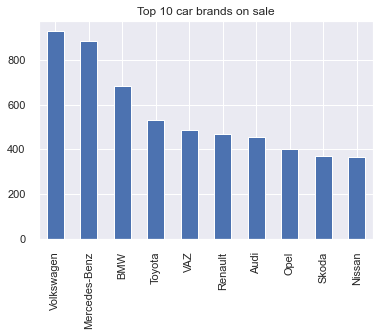

In [74]:
carsale.car.value_counts().head(10).plot.bar()
plt.title("Top 10 car brands on sale")

 - This shows __Volkswagen__ and __Mercedes-Benz__ are top most brands on sale and hence these would be preferred choices for high profile people

In [76]:
carsale[carsale.price.isin(carsale.price.nlargest())].sort_values(['car','model','body','mileage','price'])

,car,price,body,mileage,engV,engType,registration,year,model,drive
4134,Bentley,449999.0,crossover,1.0,6.00,Petrol,yes,2016,Bentayga,full
2637,Bentley,474999.0,crossover,1.0,6.00,Petrol,yes,2016,Bentayga,full
1611,Bentley,499999.0,crossover,1.0,6.00,Petrol,yes,2016,Bentayga,full
7621,Bentley,547800.0,sedan,49.5,6.75,Petrol,yes,2016,Mulsanne,rear
5849,Mercedes-Benz,300000.0,other,37.0,5.00,Petrol,yes,2012,G 500,full
4325,Mercedes-Benz,300000.0,sedan,68.0,6.00,Petrol,yes,2011,S 600,rear


 - This shows __top 5 highest price selling car and their models details__ and hence __can be used for email marketing for high profile income group peoples__ to achieve sales goals

In [77]:
carsale[carsale.price.isin(carsale.price.nsmallest())].sort_values(['car','model','body','mileage','price'])

,car,price,body,mileage,engV,engType,registration,year,model,drive
5010,GAZ,259.350,sedan,1.0,2.4,Petrol,yes,1959,21,rear
6457,Moskvich-AZLK,280.000,sedan,99.0,1.5,Petrol,yes,1976,2140,rear
7566,Moskvich-AZLK,350.000,sedan,100.0,1.5,Petrol,yes,1985,2140,rear
4905,VAZ,389.025,vagon,1.0,1.3,Petrol,yes,1983,2102,rear
8252,ZAZ,370.500,sedan,3.0,1.1,Petrol,yes,1989,968,rear


 - This shows __top 5 lowest price selling car and their models details__ and hence __can be used for email marketing for low to middle profile income group peoples__ to achieve sales goals

Text(0.5, 1.0, 'Most preferred body type used in 1953-2016')

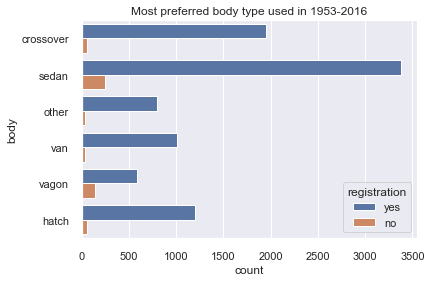

In [78]:
sns.countplot(y='body', data=carsale, orient='h', hue='registration')
plt.title("Most preferred body type used in 1953-2016")

 - This shows the __car brands having "sedan" type of body having maximum registration/sale__ over the years. This shows People prefers __sedan__ type of body mostly and hence this information can be use for achieving max sale and to figure out production of units.

Text(0.5, 1.0, 'Most preferred engType used over the years')

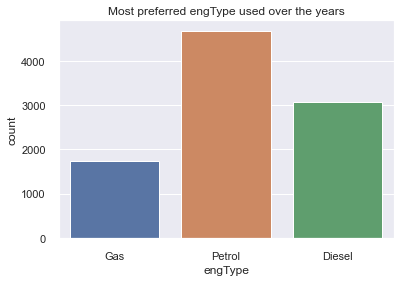

In [79]:
sns.countplot(x='engType', data=carsale, orient='h')
plt.title("Most preferred engType used over the years")

,year,registration,RegCounts
0,2008,yes,1142
1,2007,yes,914
2,2012,yes,749
3,2011,yes,681
4,2013,yes,632


Text(0.5, 1.0, 'Years group having max sale/registration')

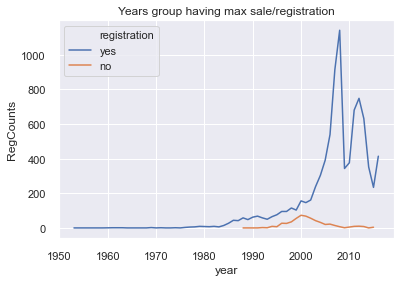

In [80]:
carsale.sort_values(['car','model','body','mileage','year'])

df = carsale.groupby('year')['registration'].value_counts().sort_values(ascending=False)
df = pd.DataFrame(df)
df.rename(columns={'registration': 'RegCounts'}, inplace=True)
df.reset_index(inplace=True)
display(df.head())
sns.lineplot(data=df, x='year', y='RegCounts', hue='registration')
#sns.scatterplot(data=df, x='year', y='RegCounts', hue='registration')
plt.title("Years group having max sale/registration")


 - This graph shows in which Year was the highest registrations, and hence shows max sale was done in the Year __2008__. 
    <br>This info can be use to start working/research why sale was max in this year.
 - What was the factors affected this sale/registrations

Text(0.5, 1.0, 'year - price lineplot (1950 - 2010)')

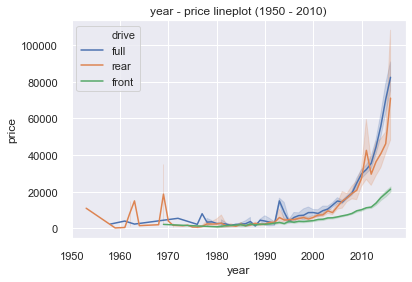

In [81]:
sns.lineplot(data=carsale, y='price', x='year', hue='drive')
plt.title("year - price lineplot (1950 - 2010)")

Text(0.5, 1.0, 'year - price lineplot (2010 - 2016)')

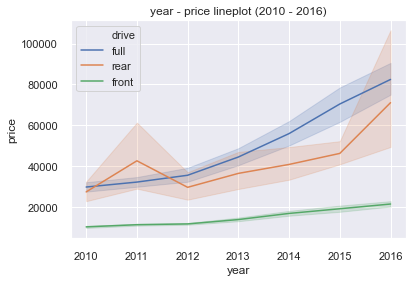

In [82]:
sns.lineplot(data=carsale[carsale.year >= 2010], y='price', x='year', hue='drive')
plt.title("year - price lineplot (2010 - 2016)")

 - The above graphs shows the __Price__ distribution over the years (1953-2016). As the years increase, we cannot comment on the price increase, but in general, __there has been an increase in price in recent years.__

Text(0.5, 1.0, 'mileage - price line Plot')

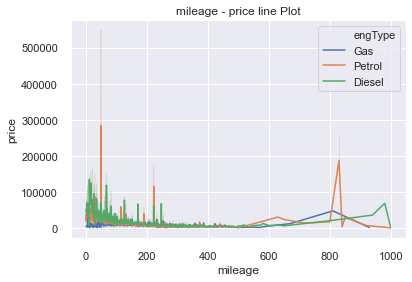

In [83]:
sns.lineplot(x='mileage',y='price',data=carsale, hue='engType')
plt.title("mileage - price line Plot")

 - The above graph shows line plot/relation between __mileage__ and __price__. We can't comment on the price increase/decrease over the mileage but this shows, price changing accordingly based on mileage value. So __price is varying based on mileage__ too and this should be consider as a factor for the calculation.

Text(0.5, 1.0, 'Heatmap for Highest correlated features for Carsale datset')

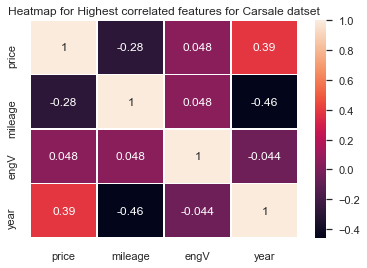

In [84]:
sns.heatmap(carsale.corr(),annot=True, linewidths=.5)
plt.title("Heatmap for Highest correlated features for Carsale datset")

 - Above graph shows the __which features are most relative/correlated and dependent on each other__. Hence it looks __price__ and __year__ are higly correlated to each other and price may change (increase/decrease over the period of time)

Text(0.5, 1.0, 'Price distribution over the year w.r.t to engType')

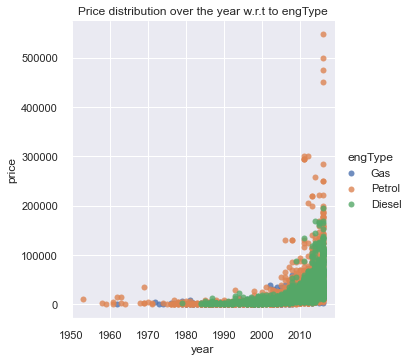

In [85]:
sns.lmplot('year','price', carsale, fit_reg=False, hue='engType')
plt.title("Price distribution over the year w.r.t to engType")

 -  The above __multivariate graphs__ shows the __Price__ distribution over the years w.r.t __engType__. As the years increase, this shows there is __significant increase in prices of cars models having engine tyep = "Petrol"__ as compared to __"Gas" and "Diesel"__.

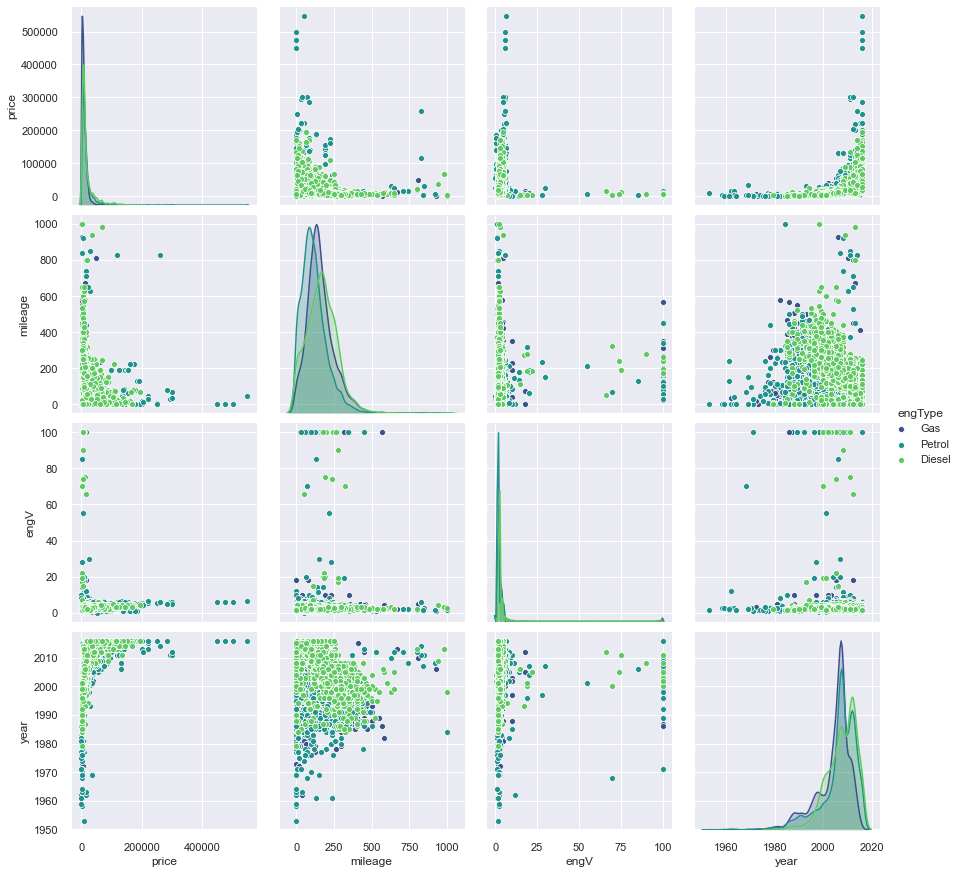

In [86]:
sns.pairplot(carsale, hue='engType', palette="viridis", height=3)

 - This pairplot gives the observations which already have been referred from other graphs above : those are
 - - Price varying based on __Year__ and __Mileage__
 - - As __Year__ increases there is increase in __Petrol__ engine type vehicles's prices which also depending on __mileage__ too.

<a id=section4></a>

## 5. Conclusion 

- With the help of notebook I learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also I have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- I have also seen how __preproceesing__ helps in dealing with _missing_ values and irregualities present in the data. I also learnt how to _create new features_ which will in turn help us to better predict the survival. 
- I also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- I have seen the impact of columns like __mileage, year and engType on the Price increase/decrease rate__.
- The most important inference drawn from all this analysis is, I get to know what are the __features on which price is highly positively and negatively coorelated with.__ 
- This analysis will help me to choose which __machine learning model__ we can apply to predict price of test dataset in later terms and projects. 

## END